# 1. Dataset Familiarization

In [1]:
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

As we can see the bboxes.json file, consists of some information about each data (polyp image).

- a dictionary belongs to each image.
- There is some information about the size of the image (as height and width).
- Also there is a bbox, which has an information about the mask image related to the original image.
- This bbox for each data, determines a rectangle that Specifies the region of interest within an image.

In [2]:
# Open the bboxes JSON file
with open('./data/Kvasir-SEG/kavsir_bboxes.json', 'r') as file:
    # Load the JSON data
    bboxes = json.load(file)

# Now bboxes contains the contents of the JSON file
print(bboxes)

{'cju0qkwl35piu0993l0dewei2': {'height': 529, 'width': 622, 'bbox': [{'label': 'polyp', 'xmin': 38, 'ymin': 5, 'xmax': 430, 'ymax': 338}]}, 'cju0qoxqj9q6s0835b43399p4': {'height': 1070, 'width': 1348, 'bbox': [{'label': 'polyp', 'xmin': 194, 'ymin': 284, 'xmax': 913, 'ymax': 1049}]}, 'cju0qx73cjw570799j4n5cjze': {'height': 529, 'width': 619, 'bbox': [{'label': 'polyp', 'xmin': 187, 'ymin': 14, 'xmax': 543, 'ymax': 526}]}, 'cju0roawvklrq0799vmjorwfv': {'height': 528, 'width': 622, 'bbox': [{'label': 'polyp', 'xmin': 486, 'ymin': 42, 'xmax': 622, 'ymax': 339}, {'label': 'polyp', 'xmin': 329, 'ymin': 71, 'xmax': 437, 'ymax': 150}, {'label': 'polyp', 'xmin': 619, 'ymin': 151, 'xmax': 622, 'ymax': 285}]}, 'cju0rx1idathl0835detmsp84': {'height': 528, 'width': 617, 'bbox': [{'label': 'polyp', 'xmin': 292, 'ymin': 154, 'xmax': 481, 'ymax': 375}]}, 'cju0s2a9ekvms080138tjjpxr': {'height': 547, 'width': 626, 'bbox': [{'label': 'polyp', 'xmin': 379, 'ymin': 57, 'xmax': 626, 'ymax': 431}]}, 'cju0s6

In [3]:
bboxes['cju0qkwl35piu0993l0dewei2']

{'height': 529,
 'width': 622,
 'bbox': [{'label': 'polyp', 'xmin': 38, 'ymin': 5, 'xmax': 430, 'ymax': 338}]}

As we can see, the details of the mask (white) part in the Mask image are available in the bbox in json file.
- y and x starts from upper-left corner. So the numbers in bbox totally make sense.

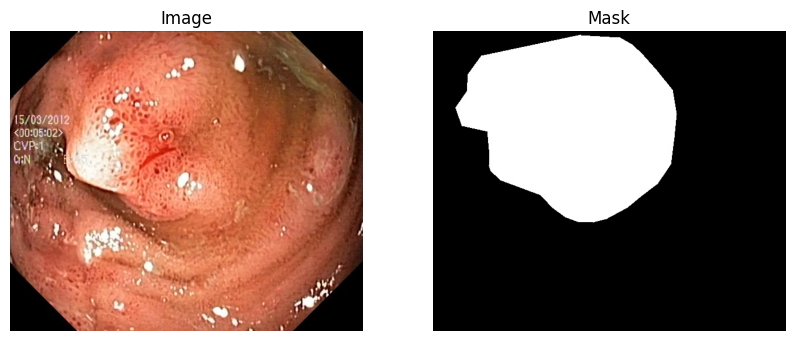

In [4]:
image1 = mpimg.imread('./data/Kvasir-SEG/images/cju0qkwl35piu0993l0dewei2.jpg')
image2 = mpimg.imread('./data/Kvasir-SEG/masks/cju0qkwl35piu0993l0dewei2.jpg')

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(image1)
axs[0].axis('off')
axs[0].set_title('Image')

axs[1].imshow(image2)
axs[1].axis('off')
axs[1].set_title('Mask')

# Show the plot
plt.show()

# 2. Preprocessing

In [5]:
from PIL import Image
import numpy as np
import pandas as pd
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Normalize and Resize:

using function resize_normalize, we make all the images, same size. And also normalize them by dividing by 255.

1. get the image from given path.
2. Resize it to the target size ($224\times224$ here).
3. Normalize the array, dividing by 255.

In [6]:
def resize_normalize(image_path, target_size=(128, 128), normalize=True, mask=False):
    # Open the image using PIL
    img = Image.open(image_path)

    # Resize the image to the target size
    if mask:
        img = (img.convert('L')).resize(target_size)
    else:
        img = img.resize(target_size)

    # Convert the image to a NumPy array
    img_array = np.array(img)

    # Normalize the pixel values
    if normalize:
        img_array = img_array / 255.0

    return img_array

In this cell we resize and normalize each image and it's mask using resize_normalize function:

- The final preprocessed data is stored at **data** DataFrame.
- And also the processed images and processed mask are stored in image_array and mask_array respectively.

In [7]:
# Directory path containing your images
image_directory = './data/Kvasir-SEG/images'

# Directory path containing the mask images
mask_directory = './data/Kvasir-SEG/masks'

# All files in the input directory
image_files = [file for file in os.listdir(image_directory) if file.endswith(('.jpg', '.png', '.jpeg'))]

data = pd.DataFrame(columns=['image_name', 'image_array', 'mask_array'])

image_array = []
mask_array = []

# Iterate through each image file
for image in image_files:
    # Construct the full path for the input image
    image_path = os.path.join(image_directory, image)
    mask_path = os.path.join(mask_directory, image)

    # Preprocess the image
    processed_image = resize_normalize(image_path)
    processed_mask = resize_normalize(mask_path, mask=True).reshape((128, 128, 1))
    
    image_array.append(processed_image)
    mask_array.append(processed_mask)
    
    new_data = pd.DataFrame({'image_name': image, 'image_array': [processed_image], 'mask_array': [processed_mask]})
    data = pd.concat([data, new_data], ignore_index=True)

print("Processing completed.")

Processing completed.


For example this is an images and it's related mask after preprocessing:

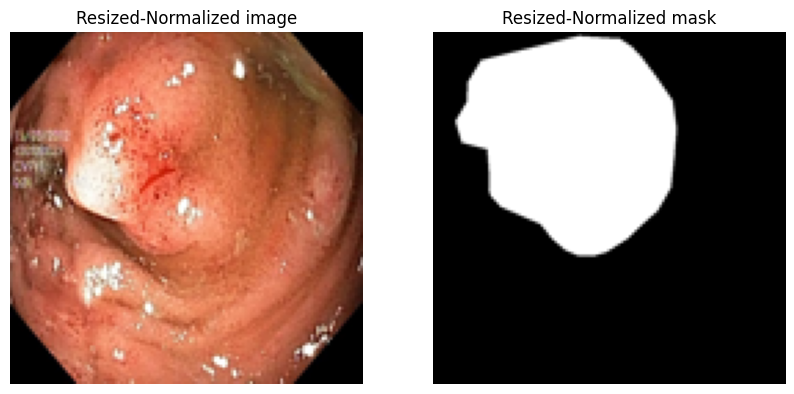

In [8]:
image1 = data.iloc[0][1]
image2 = data.iloc[0][2]

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(image1)
axs[0].axis('off')
axs[0].set_title('Resized-Normalized image')

axs[1].imshow(image2, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Resized-Normalized mask')

# Show the plot
plt.show()

This is the final data after preprocessing:

In [9]:
data.head(5)

,image_name,image_array,mask_array
0,cju0qkwl35piu0993l0dewei2.jpg,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...","[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0..."
1,cju0qoxqj9q6s0835b43399p4.jpg,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...","[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0..."
2,cju0qx73cjw570799j4n5cjze.jpg,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...","[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0..."
3,cju0roawvklrq0799vmjorwfv.jpg,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...","[[[0.03137254901960784], [0.00392156862745098]..."
4,cju0rx1idathl0835detmsp84.jpg,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...","[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0..."


# 3. Model Selection and Implementation

We use tersorflow to implement the U-net model.

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, concatenate, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow import keras
from tensorflow.keras.layers import RandomRotation
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model

1. down_block:

- This function defines a down-sampling block used in a U-Net architecture.
- It takes input x, which represents the input tensor to the block.
- It applies two convolutional layers. The default activation function is ReLU.
- After each convolutional layer, it performs max pooling with a pool size of (2, 2) and a stride of (2, 2) to reduce the spatial dimensions.

2. up_block:

- This function defines an up-sampling block in a U-Net architecture.
- It takes input x, which represents the input tensor to the block, and skip, which represents the skip connection from the corresponding down-sampling block.
- It first applies up-sampling to the input tensor to double its spatial dimensions.
- It then concatenates the up-sampled tensor with the skip connection tensor to incorporate skip connections.
- After concatenation, it applies two convolutional layers with the specified parameters.

3. bottleneck:

- This function defines the bottleneck or central part of the U-Net architecture.
- It applies two convolutional layers.

In [11]:
def down_block(x, filters, kernel_size=(3, 3), padding="same", strides=1, activation="relu"):
    conv = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation=activation)(x)
    conv = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation=activation)(conv)
    pooling = keras.layers.MaxPool2D((2, 2), (2, 2))(conv)
    return conv, pooling

def up_block(x, skip, filters, kernel_size=(3, 3), padding="same", strides=1, activation="relu"):
    up_sampling = keras.layers.UpSampling2D((2, 2))(x)
    concat = keras.layers.Concatenate()([up_sampling, skip])
    conv = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation=activation)(concat)
    conv = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation=activation)(conv)
    return conv

def bottleneck(x, filters, kernel_size=(3, 3), padding="same", strides=1, activation="relu"):
    conv = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation=activation)(x)
    conv = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation=activation)(conv)
    return conv

## U-net:
This cell defines the first U-Net architecture:

- It starts by defining an input layer with shape (128, 128, 3).
- Then, it applies three down-sampling blocks (down_block) with decreasing number of filters (8, 16, 32, 64, 128, 256).
- After the last down-sampling block, it applies the bottleneck operation to capture the most abstract features.
- Next, it applies three up-sampling blocks (up_block) with increasing number of filters (256, 128, 64, 32, 16, 8) and incorporates skip connections from the corresponding down-sampling blocks.
- Finally, it applies a convolutional layer with a single filter and a sigmoid activation function to generate the output mask.

In [12]:
def UNet():
    
    pool0 = keras.Input((128, 128, 3))
    conv1, pool1 = down_block(pool0, 8)
    conv2, pool2 = down_block(pool1, 16)
    conv3, pool3 = down_block(pool2, 32)
    conv4, pool4 = down_block(pool3, 64)
    conv5, pool5 = down_block(pool4, 128)
    conv6, pool6 = down_block(pool5, 256)
    
    bn = bottleneck(pool6, 512)
    
    up1 = up_block(bn, conv6, 256)
    up2 = up_block(up1, conv5, 128)
    up3 = up_block(up2, conv4, 64)
    up4 = up_block(up3, conv3, 32)
    up5 = up_block(up4, conv2, 16)
    up6 = up_block(up5, conv1, 8)
    
    outputs = keras.layers.Conv2D(1, (1, 1), padding="same", activation="sigmoid")(up6)
    model = keras.models.Model(pool0, outputs)
    return model

model = UNet()
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 8)          224       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 128, 128, 8)          584       ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 64, 64, 8)            0         ['conv2d_1[0][0]']            
 D)                                                                                           

Split the train and test data with input image_array and output mask_array.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(np.array(image_array), np.array(mask_array), test_size=0.3, random_state=123)

- Fit the model with 50 epochs and batch size 32.
- Save the model.
- History of loss reduction in each epoch.

As we can see, the loss for both training and validation has decreased in each epoch.

Epoch 1/30
19/19 [==============================] - 37s 2s/step - loss: 0.6884 - acc: 0.6775 - val_loss: 0.6545 - val_acc: 0.8429
Epoch 2/30
19/19 [==============================] - 33s 2s/step - loss: 0.5965 - acc: 0.8338 - val_loss: 0.5141 - val_acc: 0.8429
Epoch 3/30
19/19 [==============================] - 34s 2s/step - loss: 0.4478 - acc: 0.8338 - val_loss: 0.3769 - val_acc: 0.8429
Epoch 4/30
19/19 [==============================] - 31s 2s/step - loss: 0.3760 - acc: 0.8338 - val_loss: 0.3497 - val_acc: 0.8429
Epoch 5/30
19/19 [==============================] - 33s 2s/step - loss: 0.3609 - acc: 0.8338 - val_loss: 0.3401 - val_acc: 0.8429
Epoch 6/30
19/19 [==============================] - 31s 2s/step - loss: 0.3574 - acc: 0.8338 - val_loss: 0.3520 - val_acc: 0.8429
Epoch 7/30
19/19 [==============================] - 31s 2s/step - loss: 0.3669 - acc: 0.8338 - val_loss: 0.3452 - val_acc: 0.8429
Epoch 8/30
19/19 [==============================] - 31s 2s/step - loss: 0.3493 - acc: 0.83

c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 2s 166ms/step - loss: 0.2615 - acc: 0.8899
Test Loss: 0.2614560127258301
Test Accuracy: 0.8899151682853699


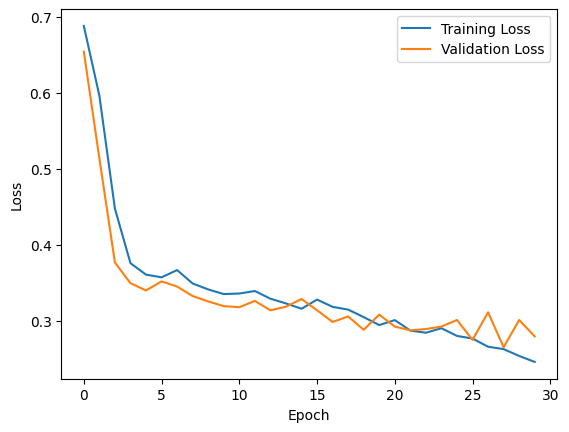

In [14]:
# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=30, validation_split=0.15)
model.save('unet_model1.h5')

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

# Print the evaluation results
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Load the model.

In [15]:
model = load_model('unet_model1.h5')

This is the dice coefficient function:

- The Dice coefficient is a commonly used metric for evaluating the performance of segmentation algorithms.
- It measures the spatial overlap between two binary masks, typically a predicted mask and a ground truth mask.

How to calculate Dice Score:

1. Intersection: Calculate the number of overlapping pixels between the predicted mask $P$ and the ground truth mask 
$G$.
2. Calculate the total number of pixels in both the predicted and ground truth masks.
3. Calculate the Dice coefficient using the formula: $$\frac{2\times|P\cap G|}{|P|+|G|}$$

- As we can see the Dice Score for testset on the first U-net model is 89.5%.

In [16]:
def dice_coefficient(y_true, y_pred):
    target_shape = (y_true.shape[0], y_true.shape[1])
    y_true = y_true.reshape(target_shape)
    y_pred = y_pred.reshape(target_shape)

    y_pred = np.where(y_pred < 0.5, 0, 1)
    return (np.sum(y_true == y_pred))/(target_shape[0]*target_shape[1])
    

predictions = model.predict(X_test)

dice_scores = []
for i in range(len(X_test)):
    dice_scores.append(dice_coefficient(y_test[i], predictions[i]))
    
print(f"Average Dice Score: {tf.reduce_mean(dice_scores)}")

10/10 [==============================] - 2s 146ms/step
Average Dice Score: 0.8899151611328125


IoU provides a measure of how well the predicted segmentation mask overlaps with the ground truth mask.

- Calculate the intersection.
- Calculate the union.
- Divide intersection by union.

In [17]:
def calculate_iou(y_true, y_pred):
    intersection = np.logical_and(y_true, y_pred)
    union = np.logical_or(y_true, y_pred)
    iou_score = np.sum(intersection) / np.sum(union)
    return iou_score

iou = []
for i in range(len(X_test)):
    iou.append(calculate_iou(y_test[i], predictions[i]))
    
print(f"Intersection over Union (IoU) score: {np.mean(iou)}")

Intersection over Union (IoU) score: 0.15464396158854166


These are the original image, the mask we want gain using the model and finally the mask we have earned by the first U-net model.

1/1 [==============================] - 0s 34ms/step


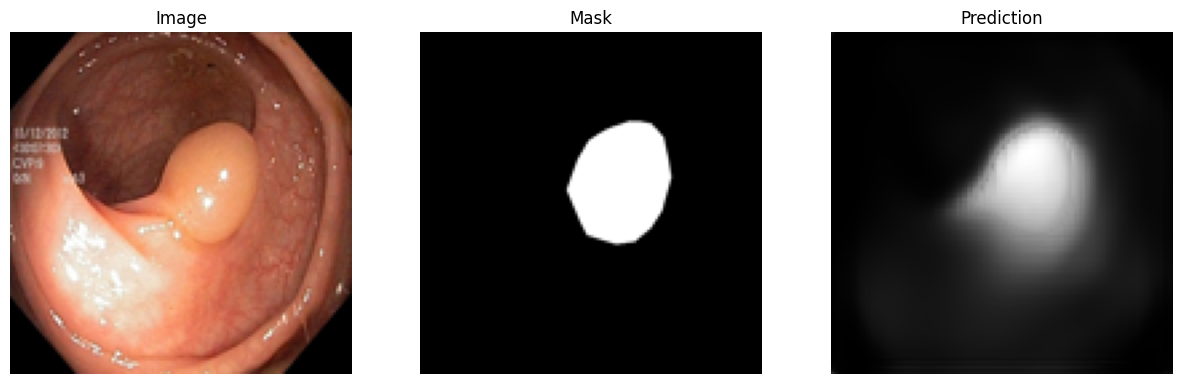

In [24]:
image1 = image_array[76]
image2 = mask_array[76]
image3 = model.predict(np.array([image_array[76]]))[0]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(image1)
axs[0].axis('off')
axs[0].set_title('Image')

axs[1].imshow(image2, cmap='gray')  # Display in grayscale
axs[1].axis('off')
axs[1].set_title('Mask')

axs[2].imshow(image3, cmap='gray')  # Display in grayscale
axs[2].axis('off')
axs[2].set_title('Prediction')

# Show the plot
plt.show()

This cell defines the Stack U-Net architecture:

- First of all, the data is $256\times256\times4$, because the output of the first U-net is concatenated with the original image.

- Downsampling Path (First UNet): Sequentially applies downsampling blocks (down_block) to extract features at different scales. Each downsampling block reduces the spatial dimensions while increasing the number of channels.

- Bottleneck Layer (First UNet): Applies a bottleneck layer to capture high-level features.

- Upsampling Path (First UNet): Applies upsampling blocks (up_block) to reconstruct the original image size from the extracted features. Each upsampling block increases the spatial dimensions while reducing the number of channels.

- Output Layer (First UNet): Applies a convolutional layer to generate the first set of outputs with a sigmoid activation function.

- Concatenation: Concatenates the original input with the outputs of first U-net.

- Downsampling Path (Second UNet): Applies downsampling blocks to the concatenated features to extract additional features.

- Bottleneck Layer (Second UNet): Applies a bottleneck layer to capture high-level features from the concatenated features.

- Upsampling Path (Second UNet): Applies upsampling blocks to reconstruct the original image size from the concatenated features.

- Output Layer (Second UNet): Applies a convolutional layer to generate the final set of outputs with a sigmoid activation function.

In [76]:
def stack_UNet():
        
    pool0 = keras.Input((128, 128, 3))
    # conv1, pool1 = down_block(pool0, 8)
    conv2, pool2 = down_block(pool0, 16)
    conv3, pool3 = down_block(pool2, 32)
    conv4, pool4 = down_block(pool3, 64)
    # conv5, pool5 = down_block(pool4, 128)
    # conv6, pool6 = down_block(pool5, 128)
    # conv7, pool7 = down_block(pool6, 256)
    
    bn = bottleneck(pool4, 128)
    
    # up1 = up_block(bn, conv5, 128)
    up2 = up_block(bn, conv4, 64)
    up3 = up_block(up2, conv3, 32)
    up4 = up_block(up3, conv2, 16)
    # up5 = up_block(up4, conv1, 8)
    # up6 = up_block(up5, conv2, 8)
    # up7 = up_block(up6, conv1, 4)
    
    first_outputs = keras.layers.Conv2D(1, (1, 1), padding="same", activation="sigmoid")(up4)
    
    concate = keras.layers.Concatenate()([pool0, first_outputs])
    # conv2_1, pool2_1 = down_block(concate, 8)
    # conv2_2, pool2_2 = down_block(pool2_1, 16)
    conv2_3, pool2_3 = down_block(concate, 32)
    conv2_4, pool2_4 = down_block(pool2_3, 64)
    conv2_5, pool2_5 = down_block(pool2_4, 128)
    # conv2_6, pool2_6 = down_block(pool2_5, 128)
    # conv2_7, pool2_7 = down_block(pool2_6, 256)
    
    bn = bottleneck(pool2_5, 256)
    
    up2_1 = up_block(bn, conv2_5, 128, activation="sigmoid")
    up2_2 = up_block(up2_1, conv2_4, 64, activation="sigmoid")
    up2_3 = up_block(up2_2, conv2_3, 32, activation="sigmoid")
    # up2_4 = up_block(up2_3, conv2_2, 16, activation="sigmoid")
    # up2_5 = up_block(up2_4, conv2_1, 8, activation="sigmoid")
    # up2_6 = up_block(up2_5, conv2_2, 8, activation="sigmoid")
    # up2_7 = up_block(up2_6, conv2_1, 4, activation="sigmoid")
    
    final_outputs = keras.layers.Conv2D(1, (1, 1), padding="same", activation="sigmoid")(up2_3)
    
    model = keras.models.Model(pool0, final_outputs)
    return model

model2 = stack_UNet()
model2.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])
model2.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d_291 (Conv2D)         (None, 128, 128, 16)         448       ['input_10[0][0]']            
                                                                                                  
 conv2d_292 (Conv2D)         (None, 128, 128, 16)         2320      ['conv2d_291[0][0]']          
                                                                                                  
 max_pooling2d_63 (MaxPooli  (None, 64, 64, 16)           0         ['conv2d_292[0][0]']          
 ng2D)                                                                                      

- Fit the model with 50 epochs and batch size 32.
- Save the model.
- History of loss reduction in each epoch.

As we can see, the loss for both training and validation has decreased in each epoch.

In [77]:
# Compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history2 = model2.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.15)
model2.save('unet_model2.h5')

Epoch 1/20
19/19 [==============================] - 143s 7s/step - loss: 0.6749 - accuracy: 0.6443 - val_loss: 0.4248 - val_accuracy: 0.8429
Epoch 2/20
19/19 [==============================] - 136s 7s/step - loss: 0.4429 - accuracy: 0.8338 - val_loss: 0.4246 - val_accuracy: 0.8429
Epoch 3/20
19/19 [==============================] - 133s 7s/step - loss: 0.4401 - accuracy: 0.8338 - val_loss: 0.4211 - val_accuracy: 0.8429
Epoch 4/20
19/19 [==============================] - 139s 7s/step - loss: 0.4350 - accuracy: 0.8338 - val_loss: 0.4152 - val_accuracy: 0.8429
Epoch 5/20
19/19 [==============================] - 138s 7s/step - loss: 0.4274 - accuracy: 0.8338 - val_loss: 0.4060 - val_accuracy: 0.8429
Epoch 6/20
19/19 [==============================] - 145s 8s/step - loss: 0.4190 - accuracy: 0.8338 - val_loss: 0.3993 - val_accuracy: 0.8429
Epoch 7/20
19/19 [==============================] - 146s 8s/step - loss: 0.4100 - accuracy: 0.8338 - val_loss: 0.3909 - val_accuracy: 0.8429
Epoch 8/20
19

c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 26s 3s/step - loss: 0.3636 - accuracy: 0.8454
Test Loss: 0.36358368396759033
Test Accuracy: 0.8453560471534729


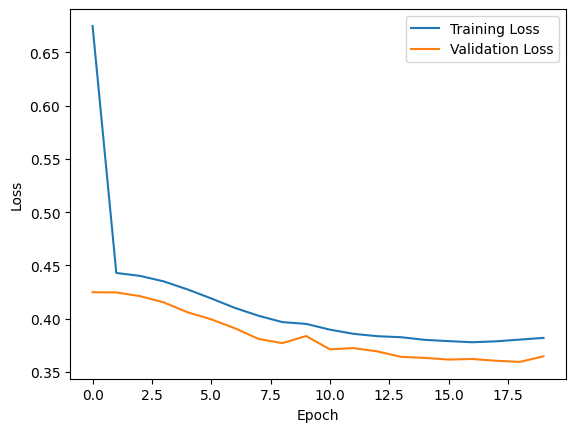

In [78]:
# Evaluate the model
loss2, accuracy2 = model2.evaluate(X_test, y_test)

# Print the evaluation results
print(f'Test Loss: {loss2}')
print(f'Test Accuracy: {accuracy2}')

# Visualize training history
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Load model2.

In [79]:
model2 = load_model('unet_model2.h5')

This is the average Dice Score for stack U-net:

In [80]:
predictions2 = model2.predict(X_test)

dice_scores2 = []
for i in range(len(X_test)):
    dice_scores2.append(dice_coefficient(y_test[i], predictions2[i]))
    
print(f"Average Dice Score: {tf.reduce_mean(dice_scores2)}")

10/10 [==============================] - 25s 2s/step
Average Dice Score: 0.8453560384114583


This is IoU score for stack U-net:

In [81]:
iou2 = []
for i in range(len(X_test)):
    iou2.append(calculate_iou(y_test[i], predictions2[i]))
    
print(f"Intersection over Union (IoU) score: {np.mean(iou2)}")

Intersection over Union (IoU) score: 0.15464396158854166


These are the:
1. original image
2. mask image
3. predicted mask from first U-net
4. predicted mask form second U-net

As we can see, the second U-net is predicting the masks much better than the first U-net.

1/1 [==============================] - 0s 70ms/step


1/1 [==============================] - 0s 150ms/step


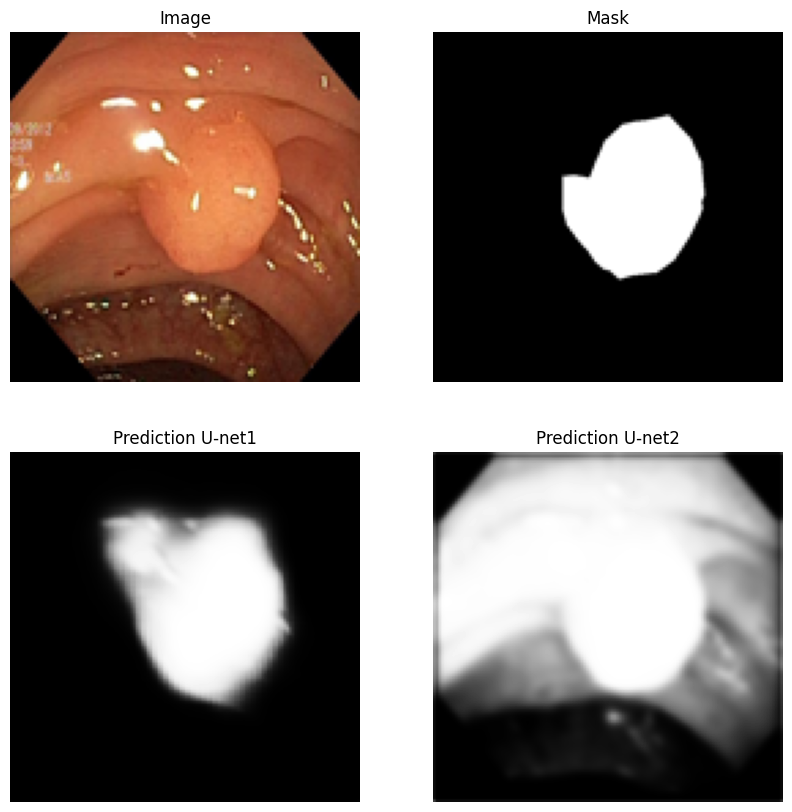

In [86]:
image1 = image_array[345]
image2 = mask_array[345]
image3 = model.predict(np.array([image_array[345]]))[0]
image4 = model2.predict(np.array([image_array[345]]))[0]

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0][0].imshow(image1)
axs[0][0].axis('off')
axs[0][0].set_title('Image')

axs[0][1].imshow(image2, cmap='gray')  # Display in grayscale
axs[0][1].axis('off')
axs[0][1].set_title('Mask')

axs[1][0].imshow(image3, cmap='gray')  # Display in grayscale
axs[1][0].axis('off')
axs[1][0].set_title('Prediction U-net1')

axs[1][1].imshow(image4, cmap='gray')  # Display in grayscale
axs[1][1].axis('off')
axs[1][1].set_title('Prediction U-net2')

# Show the plot
plt.show()